# Odds and ends

is vs ==

Write to files, .join()

precision limits of floats

tuples

Passing functions as arguments: example: resample with mean, min, max, median

# Functions can also be arguments to other functions
As you saw in ps9 sometimes you want the mean, sometimes the median, sometimes the extreme value. You functions called boostrap means, bootstrap minimum. In some cases its useful to have a more general function that accepts any summary stat and returns an answer based on that.

In [1]:
# pass functions as arguments

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
sample = np.random.normal(0, 1, 10)
print(sample)
print(np.mean(sample), min(sample), max(sample))

[-0.15895463 -0.06943803  2.155793   -1.13454821 -0.77813221 -0.59266742
  0.61071141 -0.80555982  0.3776159   1.14021756]
0.0745037531016 -1.13454821261 2.15579299675


In [8]:
# What if we want summary stats? You did bootstrap resampling with mean, min, etc.
# Write one function to specify

def summarize_normal_sample(mean, sd, size, function):
        sample = np.random.normal(mean, sd, size)
        
        return function(sample)

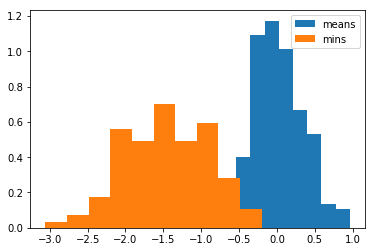

In [15]:
# Call same function, pass different sumary stats as argument
sample_mins = []
numTrials = 100

for i in range(numTrials):
    sample_min = summarize_normal_sample(0, 1, 10, np.min)
    sample_mins.append(sample_min)
    

sample_means []   
for i in range(numTrials):
    sample_mean = summarize_normal_sample(0, 1, 10, np.mean)
    sample_means.append(sample_mean)
    
    
#print(sample_means)
plt.hist(sample_means, normed = True, label = 'means')
plt.hist(sample_mins, normed = True, label = 'mins')
plt.legend()
pass

# `is` vs `==`

`is` test for identity:
`a` is `b`  - are `a` and `b` the same thing, i.e., the same memory object?

`==` tests for equality - do `a` and `b` have the same value?

In [10]:
# In the context of lists:

a = [0, 1, 2]
b = a # assign b to a
a is b

True

In [17]:
a == b

True

In [11]:
print(id(a), id(b))

4402130632 4402130632


In [14]:
b = list(a)
a is b

False

In [15]:
a == b

True

In [16]:
print(id(a), id(b))

4402130632 4513495816


In [20]:
# works for strings:
a = 'DNA'
b = 'DNA'
a is b # there are subtle cases when this won't work, such as when value read in from file

True

## Lesson: use `==` to test for equality, `is` to test for identity.

# Another data type we've danced around - tuples

In [21]:
# Tuples - liks a list, but within parentheses. Can't modify like a list

x = 10
y = 30

a = (x, y)
type(a)

tuple

In [22]:
c, d = a # unpack a tuple
print(c, d)

10 30


In [24]:
# Tuples are indexable but not changeable
a[0]

10

In [27]:
z = 5
a.append(z) # NO
a[0] = 5 # NO

TypeError: 'tuple' object does not support item assignment

In [5]:
# zip works by making tuples, which are then unpacked in a for loop:

red = [3, 4, 2]
green = [0.1, 0.3, 0.3]

for r, g in zip(red, green):
    ratio = r/g
    print(ratio)

30.0
13.333333333333334
6.666666666666667


In [6]:
list(zip(red, green))

[(3, 0.1), (4, 0.3), (2, 0.3)]

# Limits to the precision of floats... numbers with decimals.
https://docs.python.org/3/tutorial/floatingpoint.html

Numbers that can't be represented as base 2 fractions have limited precision on your computer.

"the actual stored value is the nearest representable binary fraction"

In [29]:
0.1 == 1/10

True

In [30]:
0.1 is 1/10

False

In [9]:
print(id(0.1), id(1/10))

4512577096 4512577504


In [31]:
0.1 + 0.1 + 0.1 == 0.3

False

In [35]:
0.1 + 0.1 + 0.1

0.30000000000000004

In [32]:
# Zach's example
32/10000 + 44/10000 == (32 + 44) / 10000

False

In [33]:
32/10000 + 44/10000

0.007600000000000001

In [34]:
(32 + 44)/10000

0.0076

Solution: don't test for equality, test for similarity of certain number of decimal places
If you really more precision, there are some specialized tools and workaround, but ultimately you're limited by your hardware. We're not sending a spaceship to Jupiter, don't need heavy numerical calculations.

# While loops

In [1]:
import numpy as np
loops = 0
score = 0

while score < 20:
    
    score += 0.5
    loops += 1
    
print("number of loops: ",loops)

number of loops:  40


In [2]:
red = np.random.normal(100, 15, 96)
green = np.random.normal(10, 2, 96)
red/green

array([  9.99189929,   8.54335198,   9.21468407,  27.85421922,
         8.88339942,  10.94862674,  10.15033467,  10.35241269,
        13.17247551,   7.59450959,  11.29402429,  11.16033105,
         6.80299399,   8.61068882,  15.67044606,   9.71144716,
         7.25596993,   8.64631456,  11.17929431,   8.55732172,
         8.44927139,  11.12143382,  13.37488095,  12.81734489,
         6.61270764,  14.80068981,  12.54053065,   7.90947475,
        10.63438442,   8.92725774,   7.65861684,  10.56291279,
        10.56346206,   9.92903403,   8.92685953,   7.3233232 ,
         9.81514072,   8.8587238 ,   7.88596424,  13.02603654,
         4.31052306,   5.97961791,  11.67139125,  13.20241966,
        13.15649969,   5.0746993 ,  10.19604421,  13.29478457,
        10.83417468,   9.9182934 ,  11.0166064 ,  10.05905288,
        10.12216082,  11.34446752,   6.62295429,   9.04971963,
         9.25406126,   6.86550258,  16.17612857,  11.08618924,
         7.57048189,  10.38254311,   9.22313749,  11.15